<a href="https://colab.research.google.com/github/ankitlade12/Hepatitis_Mortality_Prediction/blob/main/Hepatitis_Mortality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# Libraries
import lime
import eli5
import joblib
import warnings
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import lime.lime_tabular
from sklearn import tree
import lime.lime_tabular
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving hepatitis.data to hepatitis.data


{'hepatitis.data': b'2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1\n2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1\n2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1\n2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1\n2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1\n2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1\n1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1\n2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1\n2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1\n2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1\n2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1\n2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1\n2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1\n2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1\n2,47,1,1,1,2,2,2,2,2,2,2,2,2,?,?,60,?,?,1\n2,38,1,1,2,1,1,1,2,2,2,2,1,2,2.00,72,89,2.9,46,1\n2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.20,102,53,4.3,?,1\n2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1\n2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.70,53,42,4.1,85,2\n2,38,1,1,1,2,2,2,1,1,2,2,2,2,0.70,70,28,4.2,62,1\n2,

In [4]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [159]:
# Load Dataset
df = pd.read_csv('/content/hepatitis.data',names=col_names)

In [160]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [7]:
# Convert to lowercase
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [9]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [10]:
df.replace('?',0,inplace=True)

In [11]:
sum(df.dtypes=='object')

15

In [12]:
df.columns[df.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [13]:
# Casting and converting from one dtype to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [14]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palpable     int64
spiders             int64
ascites             int64
varices             int64
bilirubin          object
alk_phosphate       int64
sgot                int64
albumin            object
protime             int64
histology           int64
dtype: object

In [15]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

In [16]:
# Count of each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [17]:
# Shape of dataset
df.shape

(155, 20)

In [154]:
# Missing Values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [157]:
df.to_csv('clean_heaptitis_dataset.csv')

#### EDA
+ Descriptive analytics

In [19]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [20]:
# Value counts
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

In [21]:
target_label = {'Die':1,'Live':2}

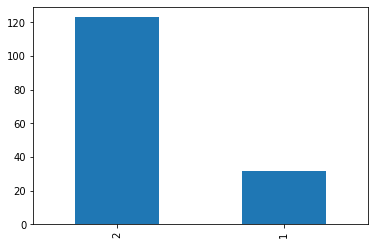

In [22]:
# Plot of Count
df['class'].value_counts().plot(kind='bar')

In [23]:
# How many are males(1) and females(2)
df['sex'].unique()

array([2, 1])

In [24]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

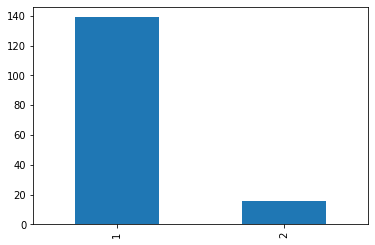

In [25]:
df['sex'].value_counts().plot(kind='bar')

In [155]:
# Age Range
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

In [27]:
df['age'].max()

78

In [28]:
df['age'].min()

7

In [29]:
labels = ['LT 10', '10-20','20-30','30-40','40-50','50-60','60-70','GT 70']
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [30]:
freq_df = freq_df.reset_index(name='count')

In [162]:
freq_df.to_csv('freq_df_heapatitis_dataset.csv')

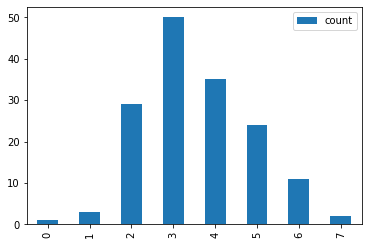

In [31]:
freq_df.plot(kind='bar')

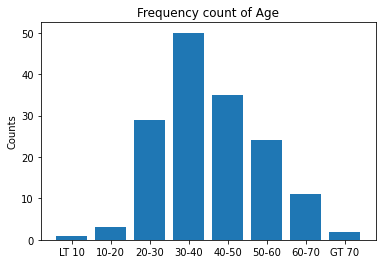

In [32]:
# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency count of Age')
plt.show()

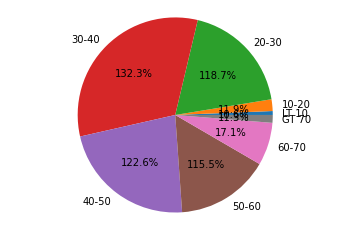

In [33]:
# Pie chart
labels = ['LT 10', '10-20','20-30','30-40','40-50','50-60','60-70','GT 70']
fig1, ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### Checking for Outliers
+ Univariate Analysis 
+ Multivariate Analysis 

#### Methods
+ Boxplot(Univariate)
+ Scatterplot (Multivariate)
+ IQR Interquartile Range

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


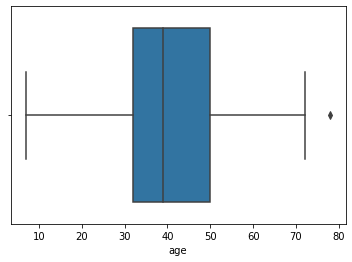

In [34]:
sns.boxplot(df['age'])

In [35]:
df[df['age']==78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


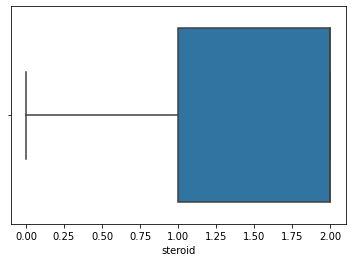

In [36]:
sns.boxplot(df['steroid'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


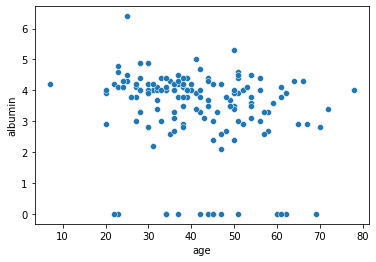

In [37]:
sns.scatterplot(df['age'],df['albumin'])

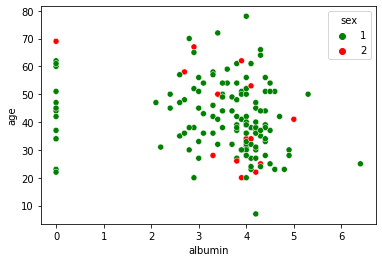

In [38]:
sns.scatterplot(y=df['age'], x=df['albumin'], hue=df['sex'], palette=['green', 'red'], data=df)

In [39]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [40]:
IQR = q3-q1

In [41]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


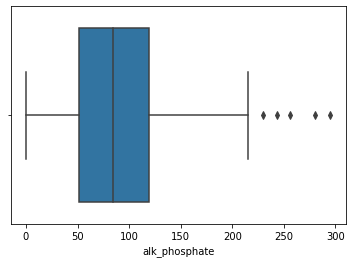

In [42]:
sns.boxplot(df['alk_phosphate'])

In [156]:
# Get the actual datapoint that is an outlier
(df < (q1 - 1.5 * IQR)) | (df> (q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [44]:
df_no_outlier = df[~((df < (q1 - 1.5 * IQR)) | (df> (q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


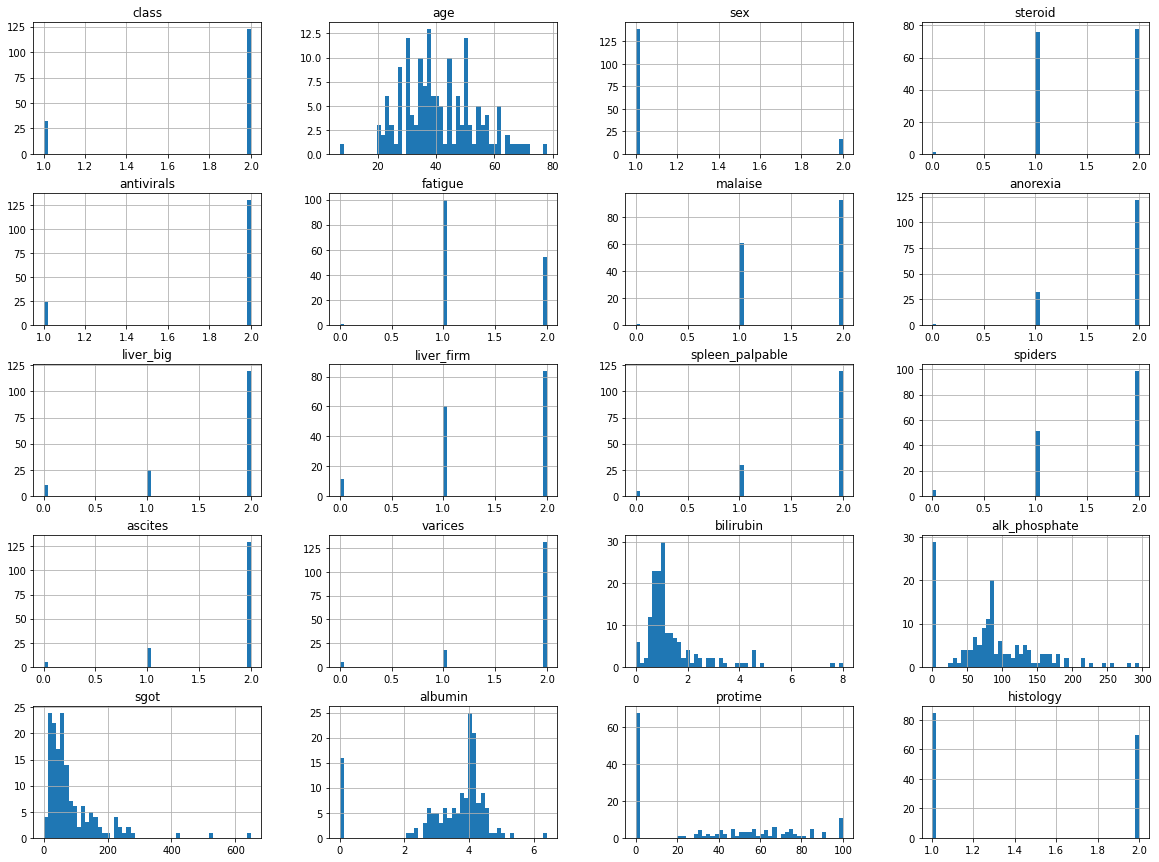

In [46]:
# Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

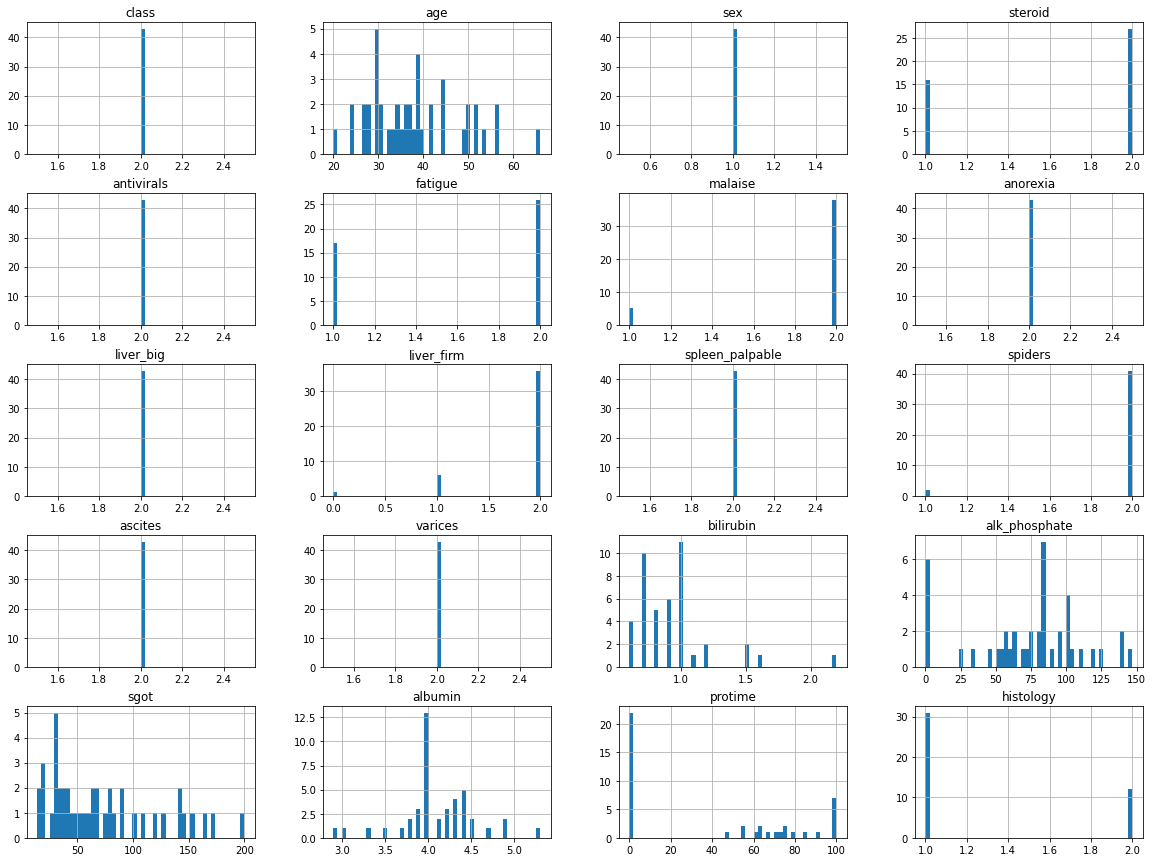

In [47]:
# Plot of distribution of data
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

#### Feature Selection and Importance
+ SelectKbest
    - Strong relation with the output/target
+ Recursive Feature Elimination

In [49]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [50]:
# using Skbest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [51]:
print("Scores", best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [53]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [54]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [55]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [56]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [57]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_Name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis=1)

In [58]:
# Get the best and higher the number more important the feature
best_feat_df.nlargest(12, 'Feature_Scores')

,Feature_Scores,Feature_Name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [59]:
best_feat_df.nlargest(12, 'Feature_Scores')['Feature_Name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### Recursive Feature Elimination

In [61]:
logit = LogisticRegression()

In [62]:
rfe = RFE(logit, 8)

In [63]:
rfe_fit = rfe.fit(xfeatures,ylabels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [64]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['Ranking_Features'])

In [65]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)

In [66]:
rfe_feature_df

,Feature_Name,Selected_Features,Ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


#### Checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [68]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [69]:
print(et_clf.feature_importances_)

[0.0551335  0.02377867 0.02763692 0.01020291 0.0287192  0.05475442
 0.02821045 0.03878075 0.04825008 0.03748597 0.06867773 0.08632523
 0.05717119 0.09752935 0.06830744 0.05653982 0.07730432 0.06694249
 0.06824956]


In [70]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeatures.columns)

In [71]:
feature_importance_df

age                0.055134
sex                0.023779
steroid            0.027637
antivirals         0.010203
fatigue            0.028719
malaise            0.054754
anorexia           0.028210
liver_big          0.038781
liver_firm         0.048250
spleen_palpable    0.037486
spiders            0.068678
ascites            0.086325
varices            0.057171
bilirubin          0.097529
alk_phosphate      0.068307
sgot               0.056540
albumin            0.077304
protime            0.066942
histology          0.068250
dtype: float64

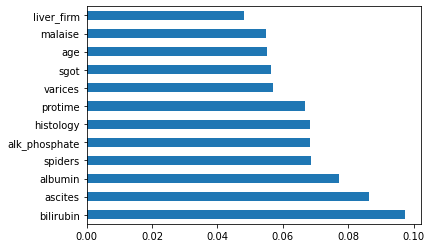

In [72]:
feature_importance_df.nlargest(12).plot(kind='barh')

In [73]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


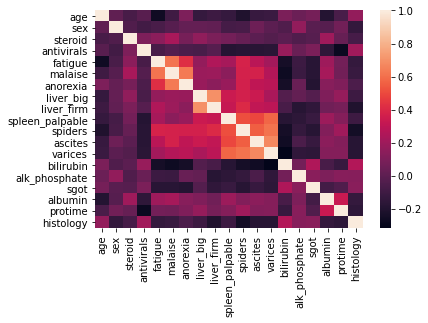

In [74]:
# Heatmap for Correlation
sns.heatmap(xfeatures.corr())

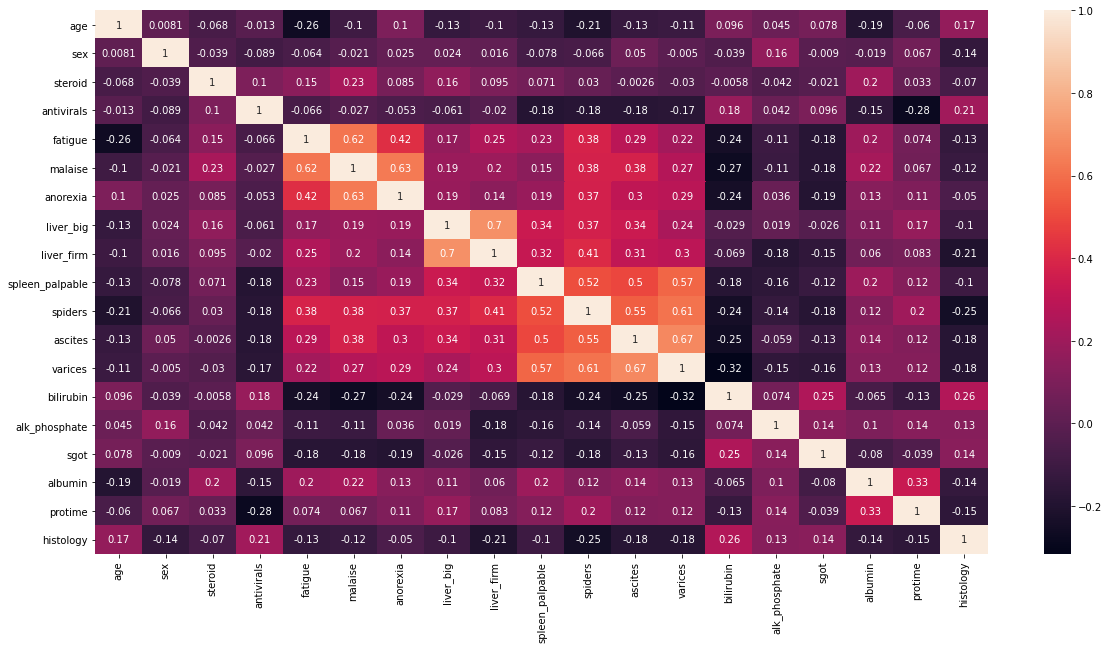

In [75]:
# Heatmap for Correlation with Annotation
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(), annot=True)
plt.show()

### Model Building
+ Feature and  Labels
+ Train/Test/Split
+ LogisticRegression
+ Decision Tree Classifier
+ KNN
+ Random Forest Classifier

In [77]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [78]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [79]:
ylabels = df['class']

In [80]:
x_features_best = df[['age','sex','steroid','antivirals','fatigue','spiders','ascites','protime', 'sgot', 
                    'bilirubin','alk_phosphate', 'albumin','histology', 'varices']]

In [81]:
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=42)

In [82]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_features_best,ylabels,test_size=0.30,random_state=7)

In [83]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# Model Accuracy Method 1
logreg.score(x_test,y_test)

0.8297872340425532

In [85]:
# Model Accuracy Method 2
logreg.predict(x_test)

array([2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2])

In [86]:
print(list(y_test))

[2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


In [87]:
accuracy_score(y_test,logreg.predict(x_test))

0.8297872340425532

In [88]:
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
model_logit.score(x_test_b,y_test_b)

0.723404255319149

In [90]:
# Single Prediction
x_test.iloc[1]

age                51.0
sex                 1.0
steroid             2.0
antivirals          2.0
fatigue             1.0
malaise             2.0
anorexia            2.0
liver_big           2.0
liver_firm          1.0
spleen_palpable     1.0
spiders             1.0
ascites             2.0
varices             1.0
bilirubin           1.0
alk_phosphate       0.0
sgot               20.0
albumin             3.0
protime            63.0
histology           2.0
Name: 142, dtype: float64

In [91]:
res_dic = {'Die': 1, 'Live': 0}
x1 = x_test.iloc[1]

In [92]:
# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([1])

In [101]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(x_train_b,y_train_b)
clf.score(x_test_b,y_test_b)

0.7659574468085106

In [100]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_b,y_train_b)
knn.score(x_test_b,y_test_b)

0.7446808510638298

In [99]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train_b,y_train_b)
rf.score(x_test_b,y_test_b)

0.8085106382978723

#### Saving Model
+ Joblib


In [103]:
model_file = open('logistic_regression_hepB_model.pk','wb')
joblib.dump(model_logit,model_file)
model_file.close()

In [104]:
model_file_knn = open('knn_hepB_model.pk','wb')
joblib.dump(knn,model_file_knn)
model_file_knn.close()

In [105]:
model_file_clf = open('Decision_Tree_hepB_model.pk','wb')
joblib.dump(clf,model_file_clf)
model_file_clf.close()

In [106]:
model_file_rf = open('Random_Forest_hepB_model.pk','wb')
joblib.dump(rf,model_file_rf)
model_file_rf.close()

In [113]:
feature_names_best = x_features_best.columns

In [114]:
target_names = ['Die','Live']

In [115]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names_best,class_names=target_names)

In [116]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

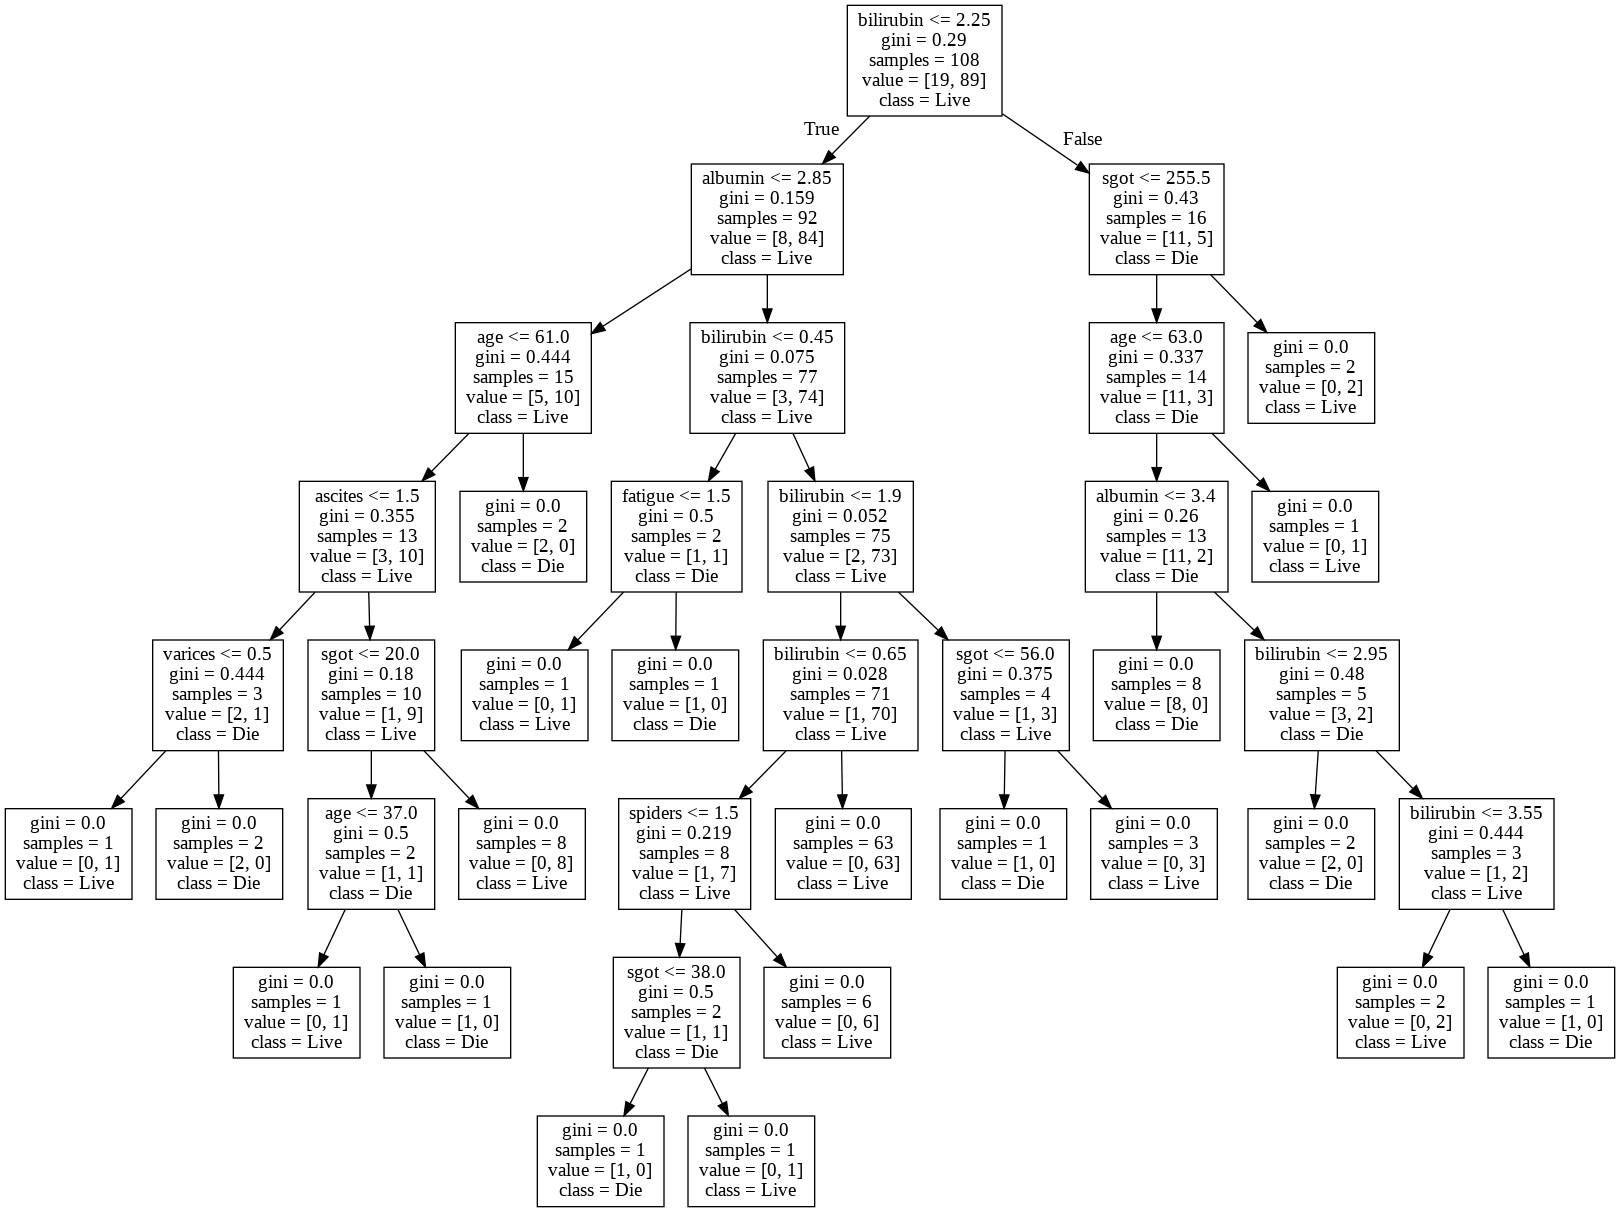

In [117]:
Image(graph.create_png())

In [118]:
# Save the plot
graph.write_png('hep_decision_tree_plot.png')

True

In [125]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'protime', 'sgot', 'bilirubin', 'alk_phosphate', 'albumin', 'histology',
       'varices'],
      dtype='object')

In [126]:
target_names

['Die', 'Live']

In [127]:
class_names = ['Die(1)','Live(2)']

### Interpret Model & Evaluate
+ Lime
+ Eli5



In [128]:
# Using Lime
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,
                                                   feature_names=feature_names_best,
                                                  class_names=class_names,
                                                  discretize_continuous=True)

In [129]:
x1

age                51.0
sex                 1.0
steroid             2.0
antivirals          2.0
fatigue             1.0
malaise             2.0
anorexia            2.0
liver_big           2.0
liver_firm          1.0
spleen_palpable     1.0
spiders             1.0
ascites             2.0
varices             1.0
bilirubin           1.0
alk_phosphate       0.0
sgot               20.0
albumin             3.0
protime            63.0
histology           2.0
Name: 142, dtype: float64

In [130]:
x_test_b.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
spiders            1.0
ascites            2.0
protime            0.0
sgot             242.0
bilirubin          2.0
alk_phosphate    167.0
albumin            3.3
histology          1.0
varices            2.0
Name: 76, dtype: float64

In [131]:
 model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

array([2])

In [132]:
exp = explainer.explain_instance(x_test_b.iloc[1],model_logit.predict_proba,num_features=14,top_labels=1)

In [133]:
exp.show_in_notebook(show_table=True,show_all=False)

In [134]:
# Explanation as list
exp.as_list()

[('bilirubin > 1.50', -0.4101518365795445),
 ('sex <= 1.00', -0.2350231501895254),
 ('spiders <= 1.00', -0.13734404326505387),
 ('sgot > 90.50', 0.10932834859379001),
 ('alk_phosphate > 119.25', -0.1051654498887131),
 ('histology <= 1.00', 0.10450909422264612),
 ('age > 50.25', -0.0585173768431027),
 ('2.98 < albumin <= 4.00', 0.044037262652563997),
 ('protime <= 0.00', 0.043315400017047555),
 ('fatigue <= 1.00', 0.042112004738619896),
 ('1.50 < steroid <= 2.00', 0.03901129906226765),
 ('antivirals <= 2.00', 0.0),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

In [138]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'protime', 'sgot', 'bilirubin', 'alk_phosphate', 'albumin', 'histology',
       'varices']

In [139]:
# Using Eli5
# Show how each feature contributes
eli5.show_weights(model_logit,feature_names=feature_names_best,target_names=class_names,top=10)

In [140]:
# Show how each feature contributes
eli5.show_prediction(model_logit,x_test_b.iloc[1],feature_names=feature_names_best,target_names=class_names,top=10)

In [143]:
y_pred = model_logit.predict(x_test_b)

In [144]:
accuracy_score(y_test_b,y_pred)

0.723404255319149

In [145]:
confusion_matrix(y_test_b,y_pred)

array([[ 2, 11],
       [ 2, 32]])

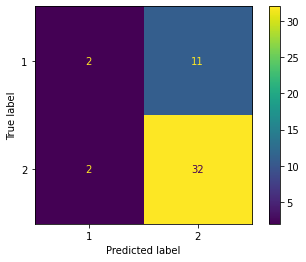

In [146]:
plot_confusion_matrix(model_logit,x_test_b,y_test_b)

In [147]:
tp, fn, fp, tn = confusion_matrix(y_test_b,y_pred).ravel()

In [148]:
print(tp)
print(fn)
print(fp)
print(tn)

2
11
2
32


In [150]:
# Classification report
print(classification_report(y_test_b,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [152]:
# Classification report
print(classification_report(y_test_b,y_pred,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.50      0.15      0.24        13
     Live(2)       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47

